In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

# Checking chemical landscapes 

In [2]:
def get_pca(data: pd.DataFrame):
    X = data.drop(columns=["cmp_id", "label"], axis=1)

    pca = PCA(n_components=2)

    pca_data = pca.fit_transform(X)

    var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
    lbls = [str(x) for x in range(1,len(var)+1)]

    plt.figure(figsize=(5,5))
    plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
    plt.title("Explained variance")
    plt.show()

    data["PCA_0"], data["PCA_1"] = pca_data[:,0], pca_data[:,1]

    sns.scatterplot(
        data=data,
        x="PCA_0",
        y="PCA_1",
        hue="label",
        alpha=0.5,
    )
    plt.xlabel('PCA 1', fontsize=18)
    plt.ylabel('PCA 2', fontsize=18)
    plt.show()


def get_umap(data: pd.DataFrame):
    X = data.drop(columns=["cmp_id", "label"], axis=1)

    umap_space = umap.UMAP()

    umap_data = umap_space.fit_transform(X)

    data["UMAP_0"], data["UMAP_1"] = umap_data[:,0], umap_data[:,1]

    sns.scatterplot(
        data=data,
        x="UMAP_0",
        y="UMAP_1",
        hue="label",
        alpha=0.5,
    )
    plt.xlabel('UMAP 1', fontsize=18)
    plt.ylabel('UMAP 2', fontsize=18)
    plt.show()

# ECFP4

In [3]:
ecfp4_dataframe = pd.read_csv("../data/fingerprints/combined_ecfp4.tsv", sep="\t")
ecfp4_dataframe.head(2)

,cmp_id,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit1015,bit1016,bit1017,bit1018,bit1019,bit1020,bit1021,bit1022,bit1023,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,acid-fast
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,fungi


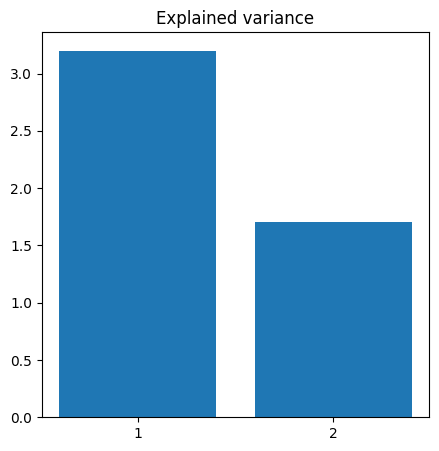

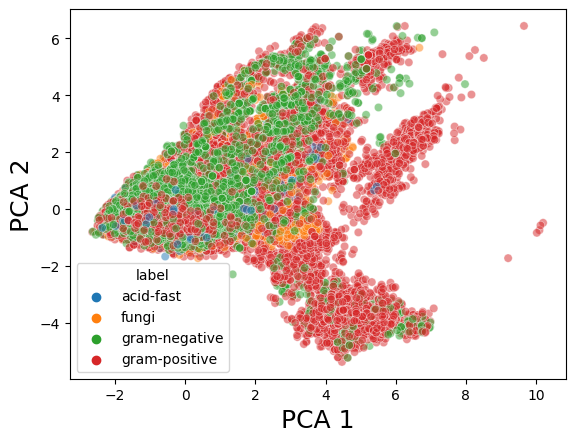

In [4]:
get_pca(ecfp4_dataframe)

d:\Anaconda\envs\scrap\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


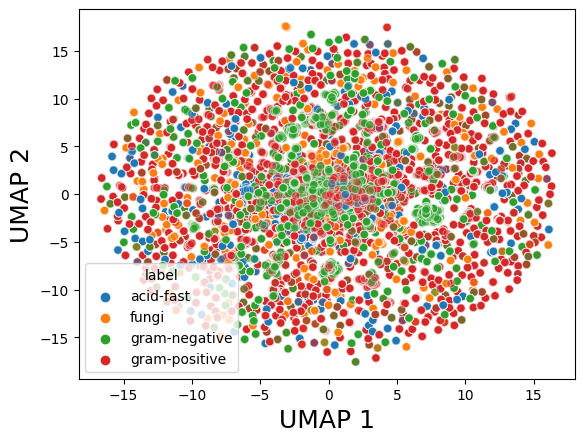

In [5]:
get_umap(ecfp4_dataframe)

# RDKit

In [6]:
rdkit_dataframe = pd.read_csv("../data/fingerprints/combined_rdkit.tsv", sep="\t")
rdkit_dataframe.head(2)

,cmp_id,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit1015,bit1016,bit1017,bit1018,bit1019,bit1020,bit1021,bit1022,bit1023,label
0,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,acid-fast
1,1,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,1,fungi


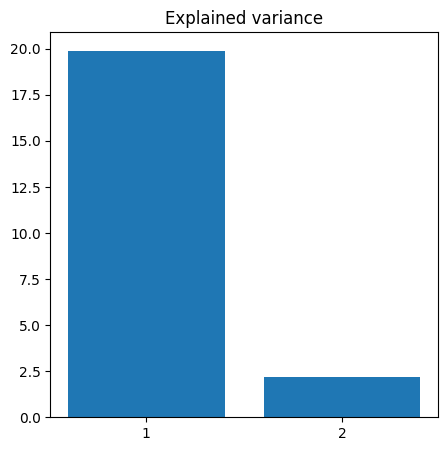

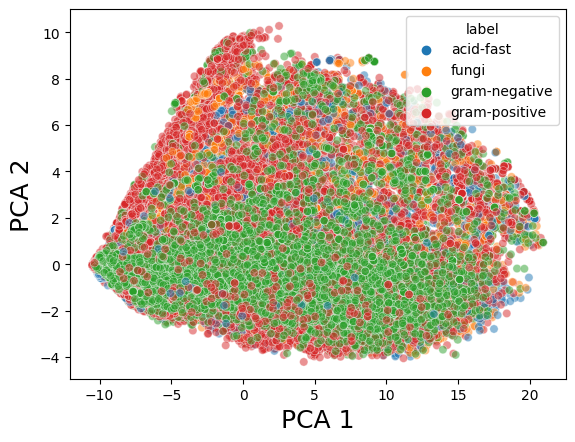

In [7]:
get_pca(rdkit_dataframe)

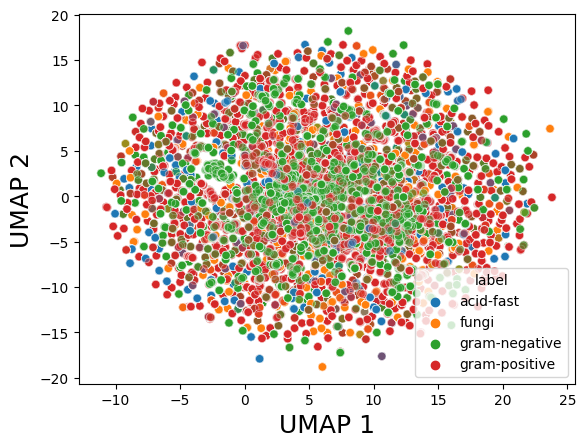

In [8]:
get_umap(rdkit_dataframe)

# MAACS

In [9]:
maacs_dataframe = pd.read_csv("../data/fingerprints/combined_maccs.tsv", sep="\t")
maacs_dataframe.head(2)

,cmp_id,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit158,bit159,bit160,bit161,bit162,bit163,bit164,bit165,bit166,label
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,1,1,acid-fast
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,fungi


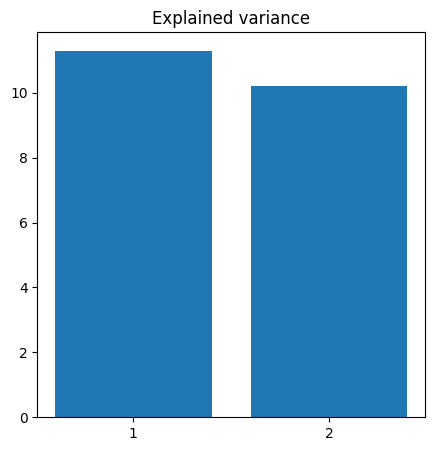

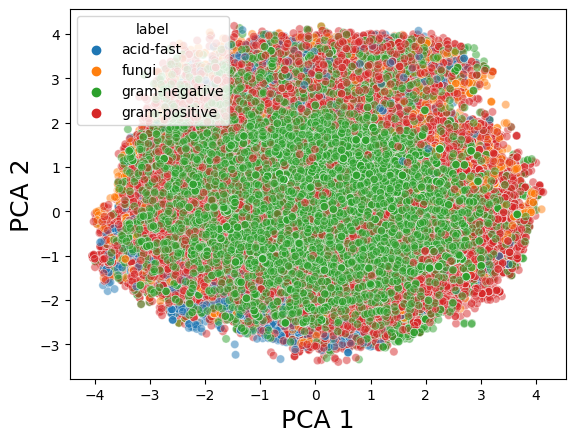

In [10]:
get_pca(maacs_dataframe)

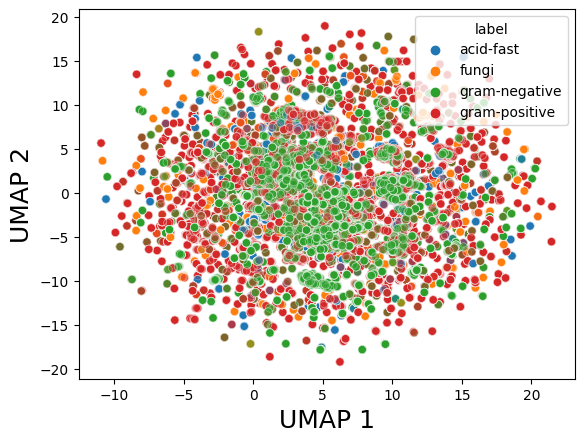

In [11]:
get_umap(maacs_dataframe)

# MHFP6

In [12]:
mhfp6_dataframe = pd.read_csv("../data/fingerprints/combined_mhfp6.tsv", sep="\t")
mhfp6_dataframe.head(2)

,cmp_id,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047,label
0,0,53109374,13294028,17313015,13405020,159565048,166773519,112685388,23281340,74257363,...,78559762,86693380,23470166,13223091,13893646,72383491,138619944,10981154,123604138,acid-fast
1,1,2376200,75861701,8411880,265132626,17183886,48771247,26537035,264241068,149295683,...,5514882,21431025,1416250,104553653,280401855,71835899,176069654,91289868,137970302,fungi


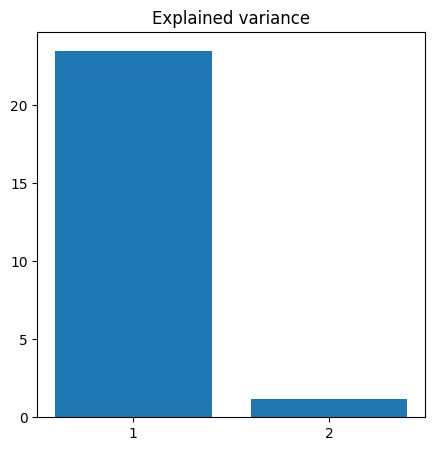

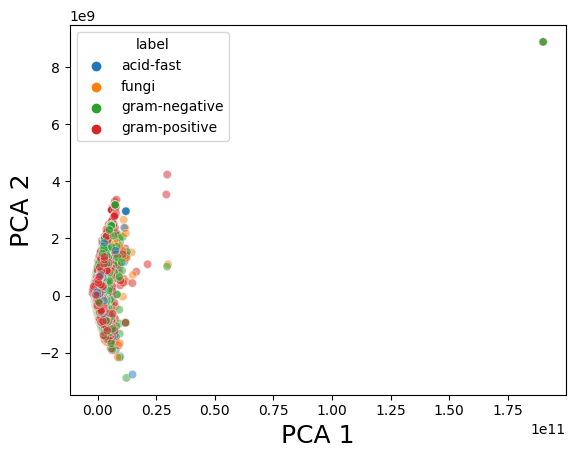

In [13]:
get_pca(mhfp6_dataframe)

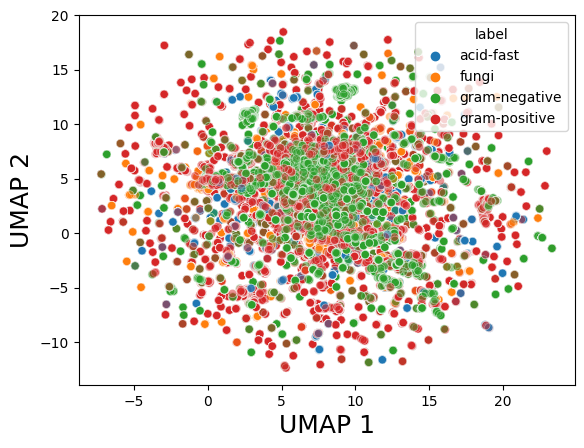

In [14]:
get_umap(mhfp6_dataframe)

# Chemphys

In [15]:
chemphys_dataframe = pd.read_csv("../data/fingerprints/combined_chemphys.tsv", sep="\t")
chemphys_dataframe.head(2)

,cmp_id,slogp,smr,labute_asa,tpsa,exact_mw,num_lipinski_hba,num_lipinski_hbd,num_rotatable_bonds,num_hba,...,num_aromatic_heterocycles,num_aliphatic_heterocycles,num_saturated_heterocycles,num_aromatic_carbocycles,num_aliphatic_carbocycles,num_saturated_carbocycles,fraction_csp3,num_brdigehead_atoms,bertz_complexity,label
0,0,-7.94,121.97,216.94,357.21,582.21,19,17,6,17,...,0,2,2,0,1,1,1.0,0,782.615188,acid-fast
1,1,5.03,76.23,119.83,17.07,294.00,1,0,3,1,...,0,0,0,2,0,0,0.0,0,647.695192,fungi


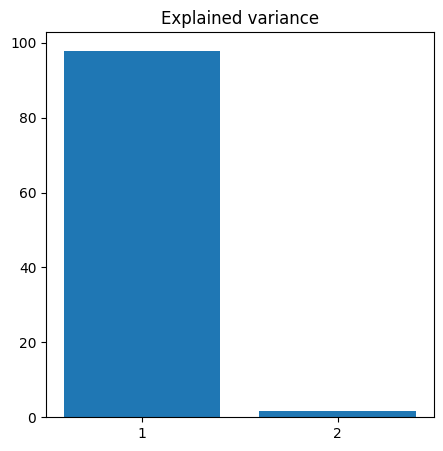

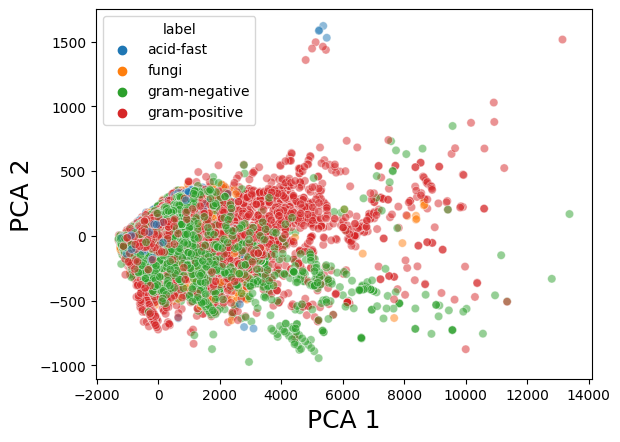

In [16]:
get_pca(chemphys_dataframe)

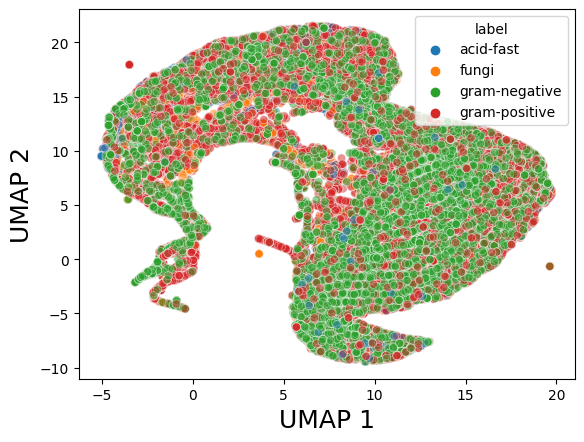

In [17]:
get_umap(chemphys_dataframe)